## Importing from Google Drive

In [0]:
# from google.colab import drive
# from pandas import read_csv
# from sklearn.model_selection import train_test_split
# from matplotlib import pyplot as plt
# import numpy as np
# from pandas import read_pickle
# import pickle

# !pip install mglearn
# drive.mount('/content/gdrive')
# root_path = 'gdrive/My Drive/Colab Notebooks/dataset-and-dict/'

# df_X = read_csv(root_path+'df_X_with_year_column.csv', header=0, index_col=0)
# df_Y = read_csv(root_path+'df_Y_GDP_constant_2010_USD.csv', header=0, index_col=0)

In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from pandas import read_pickle
import pickle

from pathlib import Path
root_path = Path('/home/hendra/Datasets/WDI_Indonesia')

df_X = read_csv(root_path / 'df_X_with_year_column.csv', header=0, index_col=0)
df_Y = read_csv(root_path / 'df_Y_GDP_constant_2010_USD.csv', header=0, index_col=0)

## Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
#import mglearn

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, train_size=0.4)

lr = LinearRegression().fit(X_train, y_train)
  
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("lr.coef_: {}".format(lr.coef_))

lr.intercept_: [332.95234522]
Training set score: 1.00
Test set score: 0.73
lr.coef_: [[-1.74978184e-24 -4.64636408e-13  8.98746969e-14 -1.34813236e-23
  -5.02377208e-17 -4.77556516e-14  3.46762200e-17 -1.77212238e-24
  -3.40949134e-25 -2.28287839e-24 -3.05600690e-24  3.64710844e-24
   6.82408038e-23  1.08795664e-25 -2.06344690e-20 -7.51448096e-18
   4.96577957e-21  6.26252156e-22 -9.43248254e-18 -3.82835184e-13
  -6.68307768e-23 -6.29317751e-22 -1.03169012e-13  2.71288549e-14
   3.08133223e-18 -2.76901244e-16 -4.16242155e-23  6.72976063e-13
   1.52699916e-13  1.68472600e-17  6.62045159e-13 -1.82497953e-23
  -4.23512884e-17 -1.80882117e-23 -2.41608399e-24 -2.54276516e-17
  -2.30999650e-13 -2.53457493e-25  2.74114842e-25 -1.28780010e-23
  -7.13112810e-25 -1.92848966e-13  3.17718523e-19 -1.90511125e-15
  -8.58715718e-26  3.78843505e-13  1.56854907e-23 -1.59366709e-19
   1.55727582e-23  2.32406017e-23  1.05141378e-25  4.33655956e-13
  -2.06052241e-15  7.93837992e-25  6.56032458e-19  8.009

In [7]:
pFile = read_pickle(root_path / "code_to_name_dict_of_indicator_names.p")

In [8]:
coefficient = lr.coef_

In [9]:
type(coefficient)

numpy.ndarray

In [10]:
coefficient.shape

(1, 163)

In [11]:
coef_transpose = coefficient.T

In [12]:
coef_transpose.shape

(163, 1)

In [13]:
indices = np.argsort(coef_transpose)[::-1]

In [14]:
np.max(coef_transpose)

1.0932868564109697e-12

In [15]:
print("Top 10 :")
for f in range(10):
  print("%d. %s -> %f" % (f+1, pFile[df_X.columns[f]], coef_transpose[indices[f]]))

Top 10 :
1. CO2 emissions (kg per 2010 US$ of GDP) -> -0.000000
2. GNI (constant LCU) -> -0.000000
3. GNI (current LCU) -> -0.000000
4. GNI per capita growth (annual %) -> -0.000000
5. GNI (constant 2010 US$) -> -0.000000
6. General government final consumption expenditure (current LCU) -> -0.000000
7. Net bilateral aid flows from DAC donors, United Kingdom (current US$) -> -0.000000
8. Food production index (2004-2006 = 100) -> -0.000000
9. Permanent cropland (% of land area) -> -0.000000
10. GNI per capita (constant 2010 US$) -> -0.000000


## Ridge Regression

In [16]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, train_size=0.25)

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 1.00
Test set score: 1.00


/home/hendra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


## Lasso

Training set score: 1.00
Test set score: -329752379.23
Number of features used: 163
[ 0.00000000e+00  4.22997068e-13 -3.99657525e-15 -0.00000000e+00
  2.84141295e-11 -1.26143199e-14  9.79710990e-07 -0.00000000e+00
 -0.00000000e+00 -2.59314229e-02 -0.00000000e+00  2.26164630e-02
 -8.57346815e-02  0.00000000e+00 -3.08765347e-07  2.45386262e-05
 -7.05407193e-04  4.52865727e-02  1.51536279e-07 -3.31671736e-14
 -2.31443609e-01 -1.80328579e-05 -8.73675241e-16  2.75765854e-15
 -3.35428087e-15 -1.24718146e-08 -0.00000000e+00 -2.25682029e-15
  6.74197541e-16  6.36972565e-16  1.53519382e-14  0.00000000e+00
  6.33194325e-10 -0.00000000e+00 -0.00000000e+00  5.74069094e-10
  5.14093224e-19  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -3.51421170e-14 -9.63304018e-07 -6.18017524e-10
 -0.00000000e+00  1.51894767e-14  0.00000000e+00  7.06308086e-07
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.77009205e-13
  1.18823252e-11 -0.00000000e+00 -9.09173535e-07  0.00000000e+00
 -0.00

Text(0, 0.5, 'Coefficient magnitude')

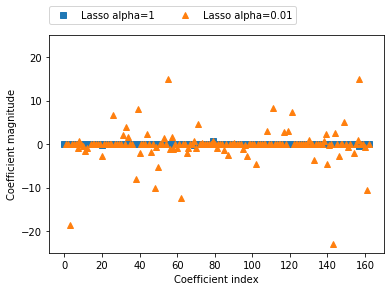

In [17]:
from sklearn.linear_model import Lasso
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, train_size=0.4)

lasso = Lasso().fit(X_train, y_train)

lasso001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))
print(lasso.coef_)

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [18]:
lassoCoef1 = lasso.coef_
lassoCoef2 = lasso001.coef_

In [19]:
lassoCoef2.shape

(163,)

In [20]:
lassoCoef1Trans = lassoCoef1.T
lassoCoef2Trans = lassoCoef2.T

In [21]:
indices1 = np.argsort(lassoCoef1Trans)[::-1]
indices2 = np.argsort(lassoCoef2Trans)[::-1]

In [22]:
print(np.max(lassoCoef1Trans))
print(np.max(lassoCoef2Trans))

0.682748026012808
4204.509197273248


In [23]:
print("Top 10 Lasso 1:")
for f in range(10):
  print("%d. %s -> %f" % (f+1, pFile[df_X.columns[f]], lassoCoef1Trans[indices1[f]]))

Top 10 Lasso 1:
1. CO2 emissions (kg per 2010 US$ of GDP) -> 0.682748
2. GNI (constant LCU) -> 0.045287
3. GNI (current LCU) -> 0.022616
4. GNI per capita growth (annual %) -> 0.000693
5. GNI (constant 2010 US$) -> 0.000190
6. General government final consumption expenditure (current LCU) -> 0.000105
7. Net bilateral aid flows from DAC donors, United Kingdom (current US$) -> 0.000029
8. Food production index (2004-2006 = 100) -> 0.000025
9. Permanent cropland (% of land area) -> 0.000001
10. GNI per capita (constant 2010 US$) -> 0.000001


In [24]:
print("Top 10 Lasso 2:")
for f in range(10):
  print("%d. %s -> %f" % (f+1, pFile[df_X.columns[f]], lassoCoef2Trans[indices2[f]]))

Top 10 Lasso 2:
1. CO2 emissions (kg per 2010 US$ of GDP) -> 4204.509197
2. GNI (constant LCU) -> 690.841888
3. GNI (current LCU) -> 28.976708
4. GNI per capita growth (annual %) -> 15.042963
5. GNI (constant 2010 US$) -> 14.894958
6. General government final consumption expenditure (current LCU) -> 8.315103
7. Net bilateral aid flows from DAC donors, United Kingdom (current US$) -> 8.043102
8. Food production index (2004-2006 = 100) -> 7.412775
9. Permanent cropland (% of land area) -> 6.736896
10. GNI per capita (constant 2010 US$) -> 5.186096
